In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.2 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
print(df.shape)
df.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [ ]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

**Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.**

In [ ]:
df.describe()

,데이터
count,2772.000000
mean,1613.116522
std,4273.426107
min,-10003.000000
25%,41.750000
50%,291.500000
75%,1181.000000
max,47689.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [ ]:
df['연도']= df['시점'].map(lambda x:int(x.split(".")[0]))

In [ ]:
df['분기'] = df['시점'].map(lambda x: int(x.split(".")[1].split("/")[0]))

In [ ]:
df.rename(columns={'데이터':'백만'}, inplace=True)

In [ ]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


**Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.**

In [ ]:
df['국가(대륙)별'].unique()

array(['미국', '중국', '일본', '아세안(ASEAN)', '유럽연합(EU)', '중동', '중남미', '대양주',
       '기타'], dtype=object)

In [ ]:
pd.pivot_table(df, index = '국가(대륙)별', columns ='연도', values='백만', aggfunc ='sum')

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


**Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.**

In [ ]:
df['연도'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
m_coun = ['미국','일본','중국']
m_pro = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

df_filtered = df[(df['국가(대륙)별'].isin(m_coun)) & (df['상품군별'].isin(m_pro)) & (df['연도'] <= 2021)]

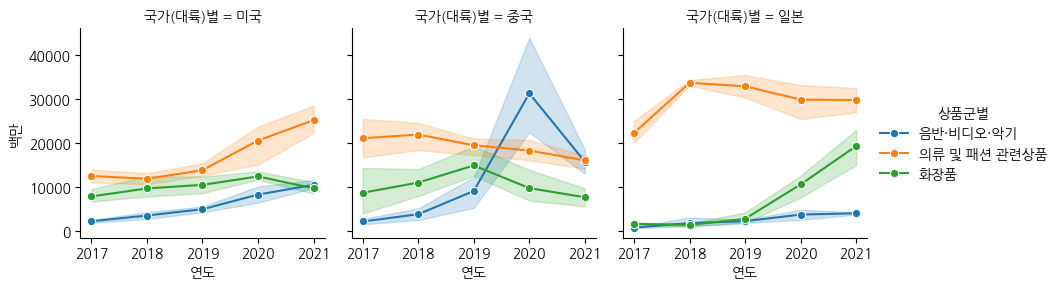

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_filtered, col='국가(대륙)별', col_wrap=3, hue='상품군별')
g.map_dataframe(sns.lineplot, "연도", "백만", marker='o')
g.add_legend()

plt.show()